# Telecom Churn Case Study

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.o reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Business Goal
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing initial Library
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
# Reading Dataset
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
telecom_df = pd.read_csv(r'D:\Download folder\Machine Learning 2\Telecom Churn Case Study\telecom_churn_data.csv')
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Null Value Checking
round(100*(telecom_df.isnull().sum()/len(telecom_df.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

**Dropping some columns as these columns either hold single unique values or the columns has no variance. So these type of columns does not require for further analysis.**

In [6]:
# Making a copy for safe analysis
telecom_df_copy = telecom_df.copy()

In [7]:
# No Variance column identification
for i in telecom_df_copy.columns:
    if telecom_df_copy[i].nunique()==1:
        print(i,     'has no variance')
        telecom_df_copy.drop(i, axis=1, inplace=True)

circle_id has no variance
loc_og_t2o_mou has no variance
std_og_t2o_mou has no variance
loc_ic_t2o_mou has no variance
last_date_of_month_6 has no variance
last_date_of_month_7 has no variance
last_date_of_month_8 has no variance
last_date_of_month_9 has no variance
std_og_t2c_mou_6 has no variance
std_og_t2c_mou_7 has no variance
std_og_t2c_mou_8 has no variance
std_og_t2c_mou_9 has no variance
std_ic_t2o_mou_6 has no variance
std_ic_t2o_mou_7 has no variance
std_ic_t2o_mou_8 has no variance
std_ic_t2o_mou_9 has no variance


In [8]:
# Dropping columns with Unique values
#print(telecom_df_copy.shape)

print(telecom_df_copy.shape)

(99999, 210)


### Deriving New Feature

#### Before Derive Feature
Imputing missing value in avg_rech_amt data and total_rech_data. Because we can get derive feature by multiplying this two features to compute the total amout recharge done by a customer. This step is to understand that how does a customer use the network.

In [9]:
# imputing missing value for total recharge
telecom_df_copy['total_rech_data_6'] = telecom_df_copy['total_rech_data_6'].replace(np.NaN,0.0)
telecom_df_copy['total_rech_data_7'] = telecom_df_copy['total_rech_data_7'].replace(np.NaN,0.0)
telecom_df_copy['total_rech_data_8'] = telecom_df_copy['total_rech_data_8'].replace(np.NaN,0.0)
telecom_df_copy['total_rech_data_9'] = telecom_df_copy['total_rech_data_9'].replace(np.NaN,0.0)

In [10]:
# Imputing missing value to avg_rech_amt_data
telecom_df_copy['av_rech_amt_data_6'] = telecom_df_copy['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom_df_copy['av_rech_amt_data_7'] = telecom_df_copy['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom_df_copy['av_rech_amt_data_8'] = telecom_df_copy['av_rech_amt_data_8'].replace(np.NaN,0.0)
telecom_df_copy['av_rech_amt_data_9'] = telecom_df_copy['av_rech_amt_data_9'].replace(np.NaN,0.0)

In [11]:
round(100*(telecom_df_copy[['total_rech_data_6','total_rech_data_7','total_rech_data_8', 'total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7',
                           'av_rech_amt_data_8','av_rech_amt_data_9']].isnull().sum()/len(telecom_df_copy.index)), 2)


total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

### Lets initiate for High value Customer filter process

In [12]:
# Total recharge Amount Data column
telecom_df_copy['total_rech_amt_data_6'] = telecom_df_copy['total_rech_data_6'] * telecom_df_copy['av_rech_amt_data_6']
telecom_df_copy['total_rech_amt_data_7'] = telecom_df_copy['total_rech_data_7'] * telecom_df_copy['av_rech_amt_data_7']
telecom_df_copy['total_rech_amt_data_8'] = telecom_df_copy['total_rech_data_8'] * telecom_df_copy['av_rech_amt_data_8']
telecom_df_copy['total_rech_amt_data_9'] = telecom_df_copy['total_rech_data_9'] * telecom_df_copy['av_rech_amt_data_9']

In [13]:
round(100*(telecom_df_copy[['total_rech_amt_6','total_rech_amt_7']].isnull().sum()/len(telecom_df_copy.index)), 2)

total_rech_amt_6    0.0
total_rech_amt_7    0.0
dtype: float64

In [14]:
# Calculating Total Avg Recharge amount for good phase(6 & 7 month)
telecom_df_copy['total_avg_rech_amt_gdph'] = (telecom_df_copy['total_rech_amt_6']+
                                             telecom_df_copy['total_rech_amt_data_6'] 
                                              +telecom_df_copy['total_rech_amt_7']+
                                             telecom_df_copy['total_rech_amt_data_7'])/2

### Filtering High Value Customers

In [15]:
# Taking 70th percentile as the thresold for filtering high value customers from last created feature
filter_percentile = telecom_df_copy['total_avg_rech_amt_gdph'].quantile(0.7)
telecom_df_high_value_cust = telecom_df_copy[telecom_df_copy['total_avg_rech_amt_gdph']>filter_percentile]
print(telecom_df_high_value_cust.shape)
print('Value of 70th Percentile:',filter_percentile )

(29953, 215)
Value of 70th Percentile: 478.0


In [16]:
# Now we dont need these below columns as we have already derived new columns from them
telecom_df_copy.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

In [17]:
# Lets define Churn column
## 1 means Churn and 0 means Non-Churn
telecom_df_high_value_cust['churn'] = np.where(telecom_df_high_value_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_df_high_value_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_avg_rech_amt_gdph,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,0.0,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.7

In [18]:
# Churn Percentage count
(telecom_df_high_value_cust.churn.value_counts(normalize=True))*100

0    91.877274
1     8.122726
Name: churn, dtype: float64

As we can see that churn rate is only 8% and non churn rate is more than 91%. So it is a clear scenario of data imbalance

In [19]:
# Dropping all columns that belong to churn month
col_belong_to_churn_month =  telecom_df_high_value_cust.columns[telecom_df_high_value_cust.columns.str.contains('_9')]
print(col_belong_to_churn_month)
telecom_df_high_value_cust.drop(col_belong_to_churn_month,axis=1, inplace=True)

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9

In [20]:
telecom_df_high_value_cust.shape

(29953, 164)

In [21]:
round(100*(telecom_df_high_value_cust.isnull().sum()/len(telecom_df_high_value_cust.index)), 2).sort_values(ascending=False)

count_rech_3g_8             46.80
date_of_last_rech_data_8    46.80
arpu_2g_8                   46.80
max_rech_data_8             46.80
arpu_3g_8                   46.80
count_rech_2g_8             46.80
fb_user_8                   46.80
night_pck_user_8            46.80
fb_user_6                   44.11
night_pck_user_6            44.11
arpu_2g_6                   44.11
arpu_3g_6                   44.11
count_rech_3g_6             44.11
count_rech_2g_6             44.11
max_rech_data_6             44.11
date_of_last_rech_data_6    44.11
count_rech_3g_7             43.12
count_rech_2g_7             43.12
arpu_3g_7                   43.12
max_rech_data_7             43.12
arpu_2g_7                   43.12
night_pck_user_7            43.12
date_of_last_rech_data_7    43.12
fb_user_7                   43.12
std_ic_mou_8                 3.91
loc_og_t2c_mou_8             3.91
loc_ic_mou_8                 3.91
std_og_t2m_mou_8             3.91
std_og_t2t_mou_8             3.91
og_others_8   

In [22]:
# Dropping High Null Percentage col
col = telecom_df_high_value_cust.columns
high_null_col = round(100*(telecom_df_high_value_cust.isnull().sum()/len(telecom_df_high_value_cust.index)), 4)
null_df = pd.DataFrame({'col_name':col, 'null_percentage':high_null_col})
col_to_drop = null_df.loc[(null_df['null_percentage']>30.0)]['col_name']
telecom_df_high_value_cust.drop(col_to_drop, axis=1, inplace=True)

In [23]:
telecom_df_high_value_cust.shape

(29953, 140)

In [24]:
# Only object columns
list(telecom_df_high_value_cust.select_dtypes(include=['object']).columns)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [25]:
# lets check the correlation amongst the features, drop the highly correlated ones
cor = telecom_df_high_value_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6             vol_3g_mb_6              0.601325
total_ic_mou_7           loc_ic_t2t_mou_7         0.601655
total_rech_amt_data_8    av_rech_amt_data_8       0.602903
total_rech_amt_8         arpu_6                   0.604021
roam_og_mou_8            roam_og_mou_7            0.605131
offnet_mou_8             offnet_mou_6             0.605156
total_ic_mou_8           loc_ic_t2t_mou_8         0.605215
std_ic_mou_6             std_ic_t2m_mou_7         0.606385
std_ic_mou_7             std_ic_t2m_mou_8         0.606808
loc_og_mou_6             loc_og_t2t_mou_7         0.607058
aug_vbc_3g               vol_3g_mb_8              0.607485
total_rech_amt_8         total_rech_amt_6         0.609635
total_og_mou_6           std_og_t2t_mou_6         0.610419
total_rech_amt_6         arpu_8                   0.611035
std_og_mou_7             std_og_t2t_mou_8         0.611100
monthly_3g_7             monthly_3g_6             0.611504
roam_ic_mou_8            roam_ic_mou_7            0.6115

In [26]:
# we will drop the columns with high correlation (+/- 60%)
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
telecom_df_high_value_cust.drop(drop_col_list, axis=1, inplace=True)
telecom_df_high_value_cust.shape

(29953, 98)

In [27]:
telecom_df_high_value_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_gdph,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0.00,0.00,0.00,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.0,2.0,2.0,0.0,356.0,270.0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,583.0,0


In [28]:
telecom_df_high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 98 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mobile_number            29953 non-null  int64  
 1   arpu_6                   29953 non-null  float64
 2   arpu_7                   29953 non-null  float64
 3   arpu_8                   29953 non-null  float64
 4   onnet_mou_6              29411 non-null  float64
 5   onnet_mou_7              29417 non-null  float64
 6   onnet_mou_8              28781 non-null  float64
 7   offnet_mou_6             29411 non-null  float64
 8   offnet_mou_7             29417 non-null  float64
 9   offnet_mou_8             28781 non-null  float64
 10  roam_ic_mou_6            29411 non-null  float64
 11  roam_ic_mou_7            29417 non-null  float64
 12  roam_ic_mou_8            28781 non-null  float64
 13  roam_og_mou_6            29411 non-null  float64
 14  roam_og_mou_7         

In [29]:
round(100*(telecom_df_high_value_cust.isnull().sum()/len(telecom_df_high_value_cust.index)),2).sort_values(ascending=False)

std_ic_mou_8               3.91
roam_og_mou_8              3.91
std_ic_t2t_mou_8           3.91
std_ic_t2f_mou_8           3.91
loc_ic_mou_8               3.91
spl_ic_mou_8               3.91
isd_ic_mou_8               3.91
ic_others_8                3.91
og_others_8                3.91
spl_og_mou_8               3.91
isd_og_mou_8               3.91
std_og_t2f_mou_8           3.91
loc_og_mou_8               3.91
loc_og_t2c_mou_8           3.91
std_og_mou_8               3.91
roam_ic_mou_8              3.91
onnet_mou_8                3.91
offnet_mou_8               3.91
std_ic_t2t_mou_6           1.81
spl_ic_mou_6               1.81
og_others_6                1.81
isd_ic_mou_6               1.81
onnet_mou_6                1.81
spl_og_mou_6               1.81
loc_ic_mou_6               1.81
isd_og_mou_6               1.81
ic_others_6                1.81
std_og_mou_6               1.81
offnet_mou_6               1.81
roam_ic_mou_6              1.81
std_og_t2f_mou_6           1.81
std_ic_m

In [30]:
# drop rows with null values
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['onnet_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['onnet_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['onnet_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['offnet_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['offnet_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['offnet_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['roam_ic_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['roam_ic_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['roam_ic_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['roam_og_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['roam_og_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['roam_og_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['loc_og_t2c_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['loc_og_t2c_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['loc_og_t2c_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['loc_og_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['loc_og_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['loc_og_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_og_t2f_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_og_t2f_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_og_t2f_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_og_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_og_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_og_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['isd_og_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['isd_og_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['isd_og_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['spl_og_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['spl_og_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['spl_og_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['og_others_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['og_others_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['og_others_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['loc_ic_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['loc_ic_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['loc_ic_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_ic_t2t_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_ic_t2t_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_ic_t2t_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_ic_t2f_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_ic_t2f_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_ic_t2f_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_ic_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_ic_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['std_ic_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['spl_ic_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['spl_ic_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['spl_ic_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['isd_ic_mou_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['isd_ic_mou_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['isd_ic_mou_8'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['ic_others_6'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['ic_others_7'])]
telecom_df_high_value_cust = telecom_df_high_value_cust[~np.isnan(telecom_df_high_value_cust['ic_others_8'])]

In [31]:
round(100*(telecom_df_high_value_cust.isnull().sum()/len(telecom_df_high_value_cust.index)), 4)

mobile_number              0.0
arpu_6                     0.0
arpu_7                     0.0
arpu_8                     0.0
onnet_mou_6                0.0
onnet_mou_7                0.0
onnet_mou_8                0.0
offnet_mou_6               0.0
offnet_mou_7               0.0
offnet_mou_8               0.0
roam_ic_mou_6              0.0
roam_ic_mou_7              0.0
roam_ic_mou_8              0.0
roam_og_mou_6              0.0
roam_og_mou_7              0.0
roam_og_mou_8              0.0
loc_og_t2c_mou_6           0.0
loc_og_t2c_mou_7           0.0
loc_og_t2c_mou_8           0.0
loc_og_mou_6               0.0
loc_og_mou_7               0.0
loc_og_mou_8               0.0
std_og_t2f_mou_6           0.0
std_og_t2f_mou_7           0.0
std_og_t2f_mou_8           0.0
std_og_mou_6               0.0
std_og_mou_7               0.0
std_og_mou_8               0.0
isd_og_mou_6               0.0
isd_og_mou_7               0.0
isd_og_mou_8               0.0
spl_og_mou_6               0.0
spl_og_m

In [32]:
# Now we dont need these be# Dropping Below columns as we have already derived new columns from them
telecom_df_high_value_cust.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
                                'total_rech_amt_data_6','total_rech_amt_data_7','total_rech_amt_data_8','total_avg_rech_amt_gdph'],axis = 1,inplace = True)

In [33]:
# create a new colulmn, which is average of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = telecom_df_high_value_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

telecom_df_high_value_cust.shape

(28460, 88)

In [34]:
# lets take the average now
for i, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_df_high_value_cust[avg_col_name] = (telecom_df_high_value_cust[col_6]  + telecom_df_high_value_cust[col_7])/ 2

In [35]:
telecom_df_high_value_cust.shape

(28460, 115)

In [36]:
# Lets drop the original features from which we have derive the new average features
col_to_drop = telecom_df_high_value_cust.filter(regex='_6|_7').columns
telecom_df_high_value_cust.drop(col_to_drop, axis=1, inplace=True)

In [37]:
telecom_df_high_value_cust.shape

(28460, 61)

In [38]:
# lets now conevrt AON in months
telecom_df_high_value_cust['aon_mon'] = telecom_df_high_value_cust['aon']/30
telecom_df_high_value_cust.drop('aon', axis=1, inplace=True)
telecom_df_high_value_cust['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

In [39]:
# Lets drop Mobile Number as it is not needed for analysis
telecom_df_high_value_cust.drop('mobile_number', 1, inplace=True)

In [40]:
telecom_df_high_value_cust.shape

(28460, 60)

# EDA

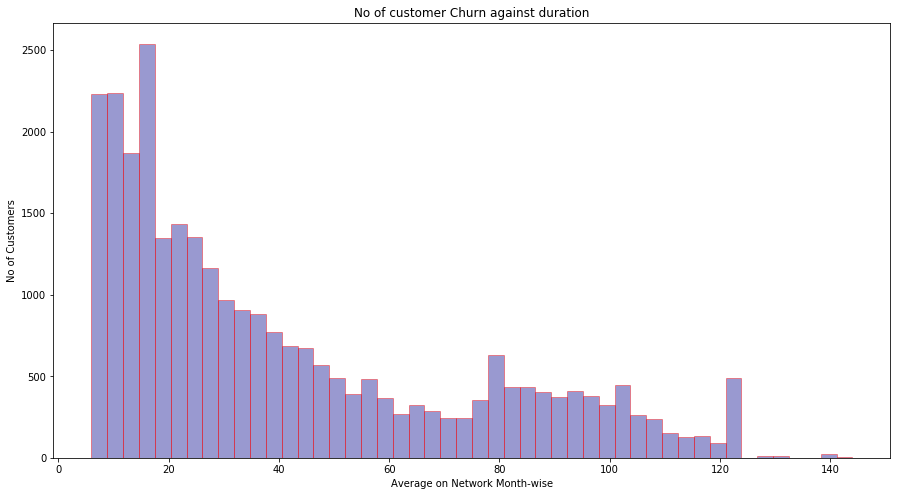

In [41]:
# Distplot for Tenure wise Churning
plt.figure(figsize=(15,8))
sns.distplot(telecom_df_high_value_cust['aon_mon'], color = 'darkblue', hist=True, kde = False,
            hist_kws={'edgecolor':'red'},kde_kws={'linewidth': 4})
plt.xlabel('Average on Network Month-wise')
plt.ylabel('No of Customers')
plt.title('No of customer Churn against duration')
plt.show()

It is clear from the above histplot that as the tenure increases churn rate decreases. So we can say that the probability of churning among customer are those who uses the connection for less amount of time. Most of the churn happened below 20.

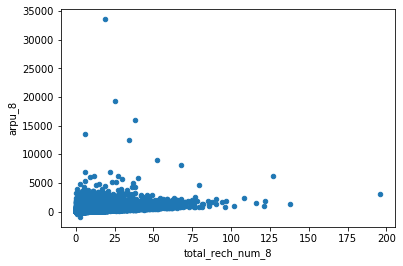

In [165]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
telecom_df_high_value_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

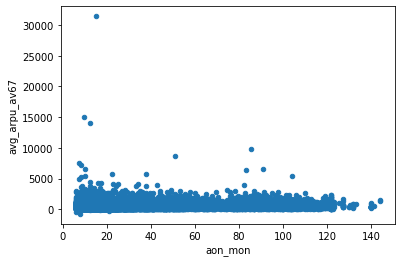

In [166]:
# plot between tenure and revenue
telecom_df_high_value_cust[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                                              y='avg_arpu_av67')
plt.show()

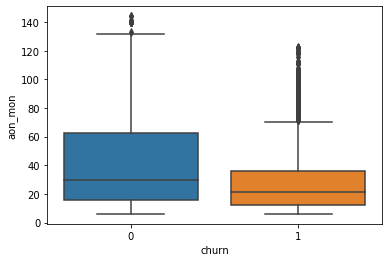

In [168]:
# Boxplot Churn vs aon_mon
sns.boxplot(x = telecom_df_high_value_cust.churn, y = telecom_df_high_value_cust.aon_mon)
plt.show()

Most of the churn happen in low tenure range.

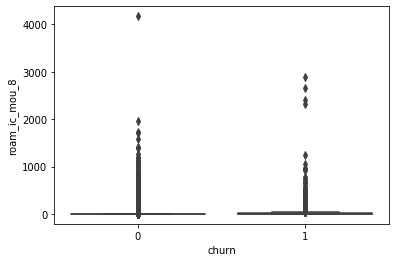

In [171]:
# Boxplot Churn vs roam_ic
sns.boxplot(x = telecom_df_high_value_cust.churn, y = telecom_df_high_value_cust.roam_ic_mou_8)
plt.show()

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

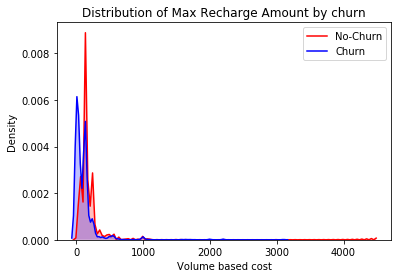

In [172]:
# churn vs max rechare amount
ax = sns.kdeplot(telecom_df_high_value_cust.max_rech_amt_8[(telecom_df_high_value_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_df_high_value_cust.max_rech_amt_8[(telecom_df_high_value_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

## Lets move for Model Building

In [42]:
# Making a copy for safe analysis
hv_cust = telecom_df_high_value_cust[:].copy()

In [43]:
# Lets devide the set into X & y
X = hv_cust.drop(['churn'], axis=1)
y = hv_cust['churn']
hv_cust.drop('churn', axis=1, inplace=True)

In [44]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [45]:
# Splitting...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)

X_train Shape: (19922, 59)
X_test Shape: (8538, 59)


In [46]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote  = smote.fit_sample(X_train, y_train)

In [47]:
print(X_train_smote.shape)
print(y_train_smote.value_counts())

(37662, 59)
1    18831
0    18831
Name: churn, dtype: int64


## Lets Start Model with Logistic Regression with RFE

In [48]:
# we will now using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# lets RFE select 15 most imp features for us
rfe = RFE(lr, 25)   
rfe = rfe.fit(X_train_smote, y_train_smote)

In [49]:
rfe_features = list(hv_cust.columns[rfe.support_])
print(rfe_features)

['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'sep_vbc_3g', 'avg_roam_og_mou_av67', 'avg_loc_og_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_t2t_mou_av67', 'avg_ic_others_av67', 'avg_vol_2g_mb_av67', 'avg_sachet_3g_av67', 'aon_mon']


In [50]:
X_train_rfe = pd.DataFrame(data=X_train_smote).iloc[:, rfe.support_]
y_train_rfe = y_train_smote

In [51]:
# lets create a Logisctic Regression model on the seleted columns by RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_train_rfe, y_train_rfe)

LogisticRegression(random_state=1)

In [52]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6376 1665]
 [  97  400]]


In [53]:
# lets check classification report on the test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8041
           1       0.19      0.80      0.31       497

    accuracy                           0.79      8538
   macro avg       0.59      0.80      0.60      8538
weighted avg       0.94      0.79      0.85      8538



In [54]:
# AUC Score
from sklearn import metrics
pred_probs_test = lr.predict_proba(X_test_rfe)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

In [55]:
# Accuracy Score
print('Accuracy on the test dataset:',metrics.accuracy_score(y_pred, y_test))

Accuracy on the test dataset: 0.7936284844225814


In [56]:
# Checking again the probability with cutoff 0.5
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':pred_probs_test})
y_test_pred_final['Churn_Prob'] = pred_probs_test
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
71025,0,0.261908,0
15249,0,0.422930,0
26336,0,0.328037,0
12033,0,0.422654,0
51053,0,0.085637,0


In [57]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
71025,0,0.261908,0,1,1,1,0,0,0,0,0,0,0
15249,0,0.422930,0,1,1,1,1,1,0,0,0,0,0
26336,0,0.328037,0,1,1,1,1,0,0,0,0,0,0
12033,0,0.422654,0,1,1,1,1,1,0,0,0,0,0
51053,0,0.085637,0,1,0,0,0,0,0,0,0,0,0


In [58]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.058210  1.000000  0.000000
0.1   0.1  0.379948  0.963783  0.343863
0.2   0.2  0.527407  0.933602  0.502301
0.3   0.3  0.640548  0.907445  0.624052
0.4   0.4  0.725111  0.867203  0.716329
0.5   0.5  0.793628  0.804829  0.792936
0.6   0.6  0.857695  0.750503  0.864320
0.7   0.7  0.901031  0.641851  0.917050
0.8   0.8  0.925744  0.466801  0.954110
0.9   0.9  0.936051  0.211268  0.980848


As we can see that **0.5 is the ideal Probability Cutoff** for model accuracy. If we little bit tune the cutoff value we can get better accuracy but simultaneously sensitivity will decrease and model become overfit. Now we will move for PCA with Logistic Regression.

## PCA

In [59]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_sample(X_train,y_train)
print(X_train_smote.shape)
print(y_train_smote.shape)

(37662, 59)
(37662,)


In [60]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# apply PCA on train data
pca.fit(X_train_smote)

PCA(random_state=100)

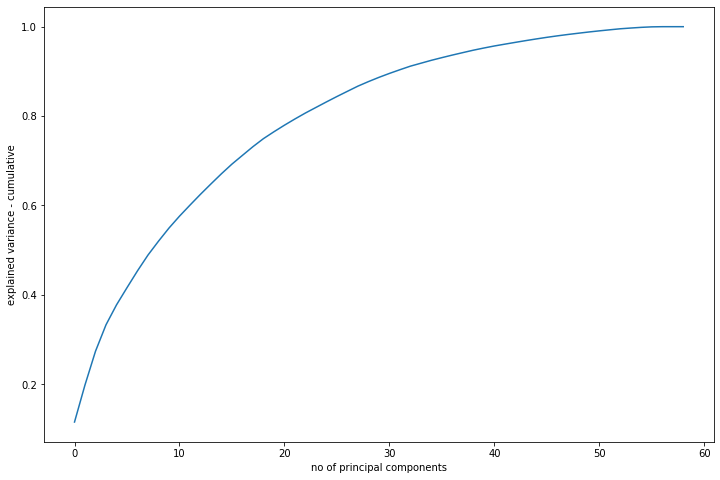

In [61]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

**40 Components can explain more than 95% of variance** so 40 components looks good.

In [62]:
# Performing Incremental PCA 
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=40)
X_train_pca = pca_again.fit_transform(X_train_smote)
print(X_train_pca.shape)

X_test_pca = pca_again.transform(X_test)
print(X_test_pca.shape)

(37662, 40)
(8538, 40)


In [63]:
# Building Logistic Regression with selected components
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca = LogisticRegression(random_state=1)
model_pca = learner_pca.fit(X_train_pca,y_train_smote)

In [64]:
# Making Prediction on train set
y_train_predictions = model_pca.predict(X_train_pca)
y_train_predprob = model_pca.predict_proba(X_train_pca)[:,1]

In [65]:
#lets print Accuracy, Recall & AUC scores (Train)
print ("Accuracy :","{:2.2}".format(metrics.accuracy_score(y_train_smote, y_train_predictions)))
print ("Recall/Sensitivity :","{:2.2}".format(metrics.recall_score(y_train_smote, y_train_predictions)))
print ("AUC Score (Train):","{:2.2}".format(metrics.roc_auc_score(y_train_smote, y_train_predprob)))

Accuracy : 0.8
Recall/Sensitivity : 0.8
AUC Score (Train): 0.88


In [66]:
# Making Prediction on Test set
y_test_predictions = model_pca.predict(X_test_pca)
y_test_predprob = model_pca.predict_proba(X_test_pca)[:,1]

In [67]:
# Print Accuracy, Recall & AUC scores (Test)
print ("Accuracy :","{:2.2}".format(metrics.accuracy_score(y_test, y_test_predictions)))
print ("Recall/Sensitivity :","{:2.2}".format(metrics.recall_score(y_test, y_test_predictions)))
print ("AUC Score (Test):","{:2.2}".format(metrics.roc_auc_score(y_test, y_test_predprob)))

Accuracy : 0.8
Recall/Sensitivity : 0.8
AUC Score (Test): 0.87


In [68]:
col = list(hv_cust.columns)
hv_cust_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
hv_cust_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.172543,0.172380,0.217806,arpu_8
1,0.075997,0.237846,0.021136,onnet_mou_8
2,0.103280,0.205960,0.102894,offnet_mou_8
3,0.341741,-0.103200,-0.120070,roam_ic_mou_8
4,0.448269,-0.058953,-0.134270,roam_og_mou_8
5,0.001165,0.088065,0.013108,loc_og_t2c_mou_8
6,0.029569,0.092013,0.215435,loc_og_mou_8
7,0.034323,0.000999,0.084590,std_og_t2f_mou_8
8,0.041463,0.291928,-0.013946,std_og_mou_8
9,0.026511,0.025701,0.063185,isd_og_mou_8


## Decision Tree

In [69]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_train_pca, y_train_smote)

DecisionTreeClassifier(max_depth=5)

In [70]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making Prediction on test set without tunning
y_pred_dt = dt1.predict(X_test_pca)

# classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8041
           1       0.18      0.65      0.29       497

    accuracy                           0.81      8538
   macro avg       0.58      0.73      0.59      8538
weighted avg       0.93      0.81      0.86      8538



In [71]:
# confusion matrix
print(confusion_matrix(y_test,y_pred_dt))
# accuracy of the decision tree
print('\nDecision Tree - Accuracy :',accuracy_score(y_test,y_pred_dt))

[[6626 1415]
 [ 176  321]]

Decision Tree - Accuracy : 0.8136565940501288


## Hyperparameter Tunning for Decision Tree

In [72]:
# Create the parameter grid 
from sklearn.model_selection import GridSearchCV
param = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param, 
                          cv = n_folds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_smote)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.9min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [73]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50)


In [74]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.482885,0.293341,0.006582,0.000489,entropy,5,25,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.761184,0.757733,0.765534,0.775757,0.775757,0.767193,0.007417,19
1,3.095519,0.257781,0.005187,0.000400,entropy,5,25,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.761317,0.757202,0.765268,0.775624,0.775624,0.767007,0.007484,20


In [75]:
# printing the optimal accuracy score
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.8287400687461979


In [76]:
# model with optimal hyperparameters
dt_final = DecisionTreeClassifier(random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
dt_final.fit(X_train_pca, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [77]:
# accuracy score
print ('Accuracy Score for Test set after Tunning :',metrics.accuracy_score(dt_final.predict(X_test_pca),y_test))

Accuracy Score for Test set after Tunning : 0.8156476926680721


## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train_smote)

# Make predictions
prediction_test = model_rf.predict(X_test_pca)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9264464745842118


In [79]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8041
           1       0.38      0.44      0.41       497

    accuracy                           0.93      8538
   macro avg       0.68      0.70      0.69      8538
weighted avg       0.93      0.93      0.93      8538



In [80]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[7691  350]
 [ 278  219]]


### Hyper Parameter Tunning

#### Tune with Max Depth

In [95]:
from sklearn.model_selection import KFold

n_fold = 5
params = {'max_depth': range(10, 30, 5)}

rf_depth = RandomForestClassifier()
grid_search = GridSearchCV(rf_depth, params, cv=n_fold, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_pca, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [96]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,23.771098,1.405559,0.187899,0.035495,10,{'max_depth': 10},0.895659,0.894332,0.902416,0.905736,0.901753,0.899979,0.004308,4,0.930267,0.928308,0.929970,0.929273,0.932791,0.930122,0.001495
1,29.839403,0.925051,0.218609,0.026604,15,{'max_depth': 15},0.947166,0.945307,0.949283,0.950611,0.945433,0.947560,0.002099,3,0.980185,0.980650,0.980352,0.980418,0.980319,0.980385,0.000153
2,36.758014,0.557383,0.261007,0.019245,20,{'max_depth': 20},0.956724,0.955131,0.959639,0.960834,0.954063,0.957278,0.002587,2,0.990574,0.990408,0.990076,0.989910,0.990076,0.990209,0.000244
3,37.822271,0.376545,0.272793,0.017607,25,{'max_depth': 25},0.960042,0.956856,0.960701,0.964153,0.959108,0.960172,0.002378,1,0.994988,0.994789,0.994358,0.994258,0.994723,0.994623,0.000274


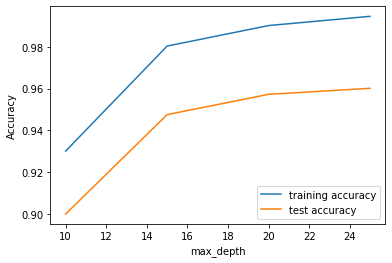

In [97]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Max_depth 20 looks good**

#### Tune with n_estimator

In [99]:
n_fold = 5
params = {'n_estimators': range(30, 150, 30)}

rf_estimator = RandomForestClassifier()
grid_search = GridSearchCV(rf_estimator, params, cv=n_fold, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_pca, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(30, 150, 30)},
             return_train_score=True, scoring='accuracy')

In [100]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.959236,0.563901,0.079793,0.002750,30,{'n_estimators': 30},0.959113,0.959379,0.961232,0.959904,0.957515,0.959429,0.001204,4,0.999967,0.999934,1.000000,0.999934,0.999768,0.99992,0.000080
1,21.973654,0.788455,0.187693,0.063813,60,{'n_estimators': 60},0.961635,0.959511,0.962161,0.963755,0.960701,0.961553,0.001423,3,1.000000,1.000000,0.999967,1.000000,0.999934,0.99998,0.000027
2,31.836593,0.693270,0.254935,0.067236,90,{'n_estimators': 90},0.962963,0.960175,0.961498,0.964950,0.961498,0.962217,0.001626,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
3,41.142803,0.416414,0.335690,0.071628,120,{'n_estimators': 120},0.963627,0.961104,0.964153,0.963091,0.960435,0.962482,0.001453,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000


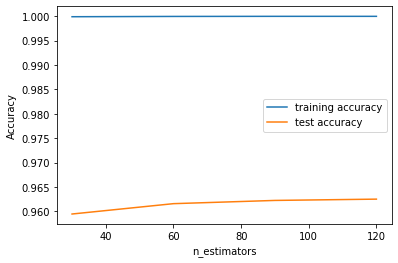

In [101]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**n_estimator 60 looks good**

#### Tune with min_sample_leaf

In [103]:
n_fold = 5
params = {'min_samples_leaf': range(25, 400, 25)}

rf_leaf = RandomForestClassifier()
grid_search = GridSearchCV(rf_leaf, params, cv=n_fold, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_pca, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(25, 400, 25)},
             return_train_score=True, scoring='accuracy')

In [104]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,29.878755,2.101169,0.213739,0.019578,25,{'min_samples_leaf': 25},0.887296,0.895128,0.900292,0.899628,0.899363,0.896341,0.004875,1,0.927479,0.926383,0.926552,0.925655,0.928078,0.926829,0.000853
1,26.969773,0.677284,0.202370,0.024952,50,{'min_samples_leaf': 50},0.855569,0.865791,0.867233,0.866702,0.870818,0.865222,0.005120,2,0.889973,0.886953,0.885197,0.884965,0.887819,0.886982,0.001839
2,25.095485,1.192548,0.205652,0.010542,75,{'min_samples_leaf': 75},0.840701,0.848799,0.853558,0.855151,0.851965,0.850035,0.005118,3,0.868499,0.866740,0.864487,0.866246,0.866611,0.866517,0.001279
3,24.806641,0.666253,0.185006,0.016700,100,{'min_samples_leaf': 100},0.829152,0.840834,0.840945,0.845592,0.841875,0.839680,0.005542,4,0.854857,0.854990,0.851012,0.852373,0.852207,0.853088,0.001571
4,23.336957,0.120772,0.174655,0.012727,125,{'min_samples_leaf': 125},0.822780,0.834993,0.835635,0.837361,0.840680,0.834289,0.006084,5,0.845697,0.845133,0.844142,0.841786,0.845868,0.844525,0.001496


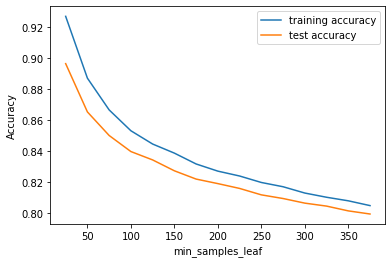

In [106]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Looking at the test accuracy setting parameter of min_sample_leaf is not the ideal for best obtain accuracy score**

### Lets see with min sample split

In [107]:
n_fold = 5
params = {'min_samples_split': range(50, 300, 50)}

rf_split = RandomForestClassifier()
grid_search = GridSearchCV(rf_split, params, cv=n_fold, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_pca, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [108]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,39.693556,1.291944,0.287044,0.057878,50,{'min_samples_split': 50},0.916899,0.923802,0.925252,0.930165,0.924323,0.924088,0.004245,1,0.965117,0.966975,0.967109,0.966379,0.966014,0.966319,0.000721
1,37.941057,1.748085,0.256319,0.074247,100,{'min_samples_split': 100},0.886499,0.895128,0.898566,0.898699,0.897902,0.895359,0.004614,2,0.929503,0.929404,0.930501,0.927282,0.931796,0.929697,0.001484
2,35.210967,0.480260,0.214578,0.002927,150,{'min_samples_split': 150},0.866189,0.876145,0.882103,0.880908,0.879713,0.877012,0.005767,3,0.904643,0.904112,0.901925,0.901261,0.904945,0.903377,0.001496
3,32.538485,2.185797,0.220811,0.070394,200,{'min_samples_split': 200},0.849197,0.864994,0.865773,0.867233,0.868030,0.863045,0.007006,4,0.888845,0.887152,0.882974,0.884202,0.886591,0.885953,0.002105
4,35.245534,1.831032,0.223599,0.018990,250,{'min_samples_split': 250},0.841099,0.855569,0.856612,0.855682,0.858869,0.853566,0.006345,5,0.872980,0.875535,0.869067,0.871922,0.873714,0.872644,0.002142


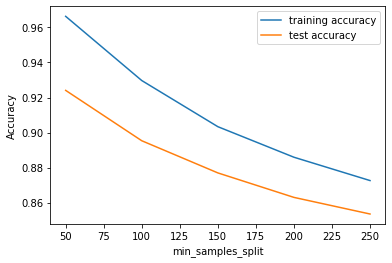

In [109]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Lets procesed for building final model with best parameters

In [127]:
# Building Final Model
final_rf = RandomForestClassifier(max_depth = 20, min_samples_split=50, n_estimators= 60 ,oob_score = True, n_jobs = -1,random_state =42)
final_rf.fit(X_train_pca, y_train_smote)

# Make predictions
prediction_test = final_rf.predict(X_test_pca)

In [128]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8041
           1       0.33      0.55      0.41       497

    accuracy                           0.91      8538
   macro avg       0.65      0.74      0.68      8538
weighted avg       0.93      0.91      0.92      8538

[[7479  562]
 [ 224  273]]


In [129]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model : 0.9079409697821503


In [130]:
final_rf.oob_score_

0.9262120970739738

In [131]:
metrics.accuracy_score(y_train_smote, final_rf.predict(X_train_pca))

0.9645796824385322

In [135]:
# Summarizing all model test score
all_model = pd.DataFrame({'Model_name':['Logistic Regression with RFE', 'Logistic Regression with PCA','Decision Tree Default',
                                       'Decision Tree with Hyper Tune','Random Forest Default','Random Forest with Hyper Tune'],
                         'Test Accuracy Score':[0.79, 0.8, 0.81, 0.83, 0.93, 0.91]},)
all_model

,Model_name,Test Accuracy Score
0,Logistic Regression with RFE,0.79
1,Logistic Regression with PCA,0.80
2,Decision Tree Default,0.81
3,Decision Tree with Hyper Tune,0.83
4,Random Forest Default,0.93
5,Random Forest with Hyper Tune,0.91


So we can clearly see that the best performing model among all models is Random Forest.

In [155]:
X = pd.DataFrame(X, columns = hv_cust.columns)

In [156]:
X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
0,5.279833,-0.414977,-0.050349,0.245508,0.161221,-0.242547,0.022543,1.340819,-0.394180,0.176043,-0.015862,-0.01784,-0.148637,0.218070,0.956838,1.039940,-0.244598,0.281192,1.058354,-0.357580,8.298044,4.768665,-0.343805,-0.385109,-0.425299,-0.336583,-0.185448,-0.271194,-0.360027,-0.334080,-0.156298,1.494406,-0.484410,0.272523,0.154591,-0.058614,-0.270673,0.592237,0.979252,-0.500931,-0.043020,-0.247112,-0.141908,0.499941,0.115944,2.212052,0.940132,0.413031,-0.041975,1.006442,-0.804584,6.682006,-0.879873,-0.419450,-0.466820,-0.472930,-0.377612,-0.230796,-0.448141
1,-0.776554,-0.452043,-0.440217,-0.172203,-0.193781,0.736837,-0.499867,-0.148125,-0.360999,-0.043239,0.164338,-0.01784,-0.700141,-0.198490,-0.131718,-0.322341,-0.244598,-0.158010,-0.097749,0.393866,-0.781371,-0.586842,-0.343710,-0.385109,0.745416,-0.336583,-0.185448,-0.358015,1.639064,-0.084658,-0.156298,-0.302679,0.252020,-0.646634,-0.220052,-0.251332,-0.270673,0.192565,-0.158801,-0.383591,-0.045007,-0.375409,-0.141908,-0.620576,-0.198609,-0.155412,-0.262266,-0.269382,-0.153297,-0.097386,0.927344,-0.313073,-0.660199,0.168220,0.812003,-0.266962,-0.377612,-0.230796,-0.953380
2,0.222288,-0.344226,1.302821,-0.172203,-0.193781,-0.242547,-0.319090,-0.148125,1.003416,-0.043239,-0.329884,-0.01784,-0.241264,-0.197390,-0.131718,0.391130,-0.244598,-0.158010,-0.097749,1.789408,-0.664218,-0.308272,-0.343805,-0.385109,-0.425299,-0.336583,-0.185448,-0.407752,-0.403496,-0.379275,-0.156298,-0.022611,-0.346654,0.961939,-0.220052,-0.251332,-0.270673,-0.462717,-0.158801,0.829708,-0.045007,-0.375409,-0.141908,-0.442460,-0.071455,-0.155412,0.101845,-0.269382,-0.153297,-0.097386,1.389192,-0.786870,-0.660199,-0.419450,-0.466820,-0.472930,-0.377612,-0.230796,-0.533212
3,-0.318242,-0.455274,-0.297364,-0.172203,-0.193781,2.183313,-0.177070,-0.148125,-0.456239,-0.043239,0.525706,-0.01784,-0.032829,-0.015858,-0.131718,0.076351,-0.244598,-0.106012,0.899524,-0.679628,0.091424,-0.656485,-0.343773,-0.385109,-0.425299,1.285900,0.714901,-0.312086,-0.287175,-0.379275,-0.156298,-1.002315,-0.498976,-0.647200,-0.220052,-0.251332,-0.270673,-0.360027,-0.158801,-0.609368,-0.044897,-0.372558,-0.141908,-0.313473,-0.199066,-0.155412,-0.296364,-0.269382,0.036132,0.093545,-0.920046,-0.526940,-0.093439,-0.418657,-0.466820,-0.472930,1.393311,-0.230796,-0.653556
4,-0.233879,-0.527597,-0.721109,-0.172203,-0.193781,-0.165840,-0.670724,-0.148125,-0.520539,-0.043239,-0.302830,-0.01784,-0.620897,-0.199178,-0.125346,-0.320297,-0.244598,-0.158010,-0.082477,-1.001676,1.708146,2.512248,-0.318608,-0.385109,-0.425299,1.285900,-0.185448,0.439175,5.667840,3.756055,-0.156298,2.563337,-0.611462,-0.837240,-0.220052,-0.251332,-0.270673,-0.726310,-0.158801,-0.616788,-0.045007,-0.375409,-0.141908,-0.787368,-0.183384,-0.122816,-0.329469,-0.269382,-0.153297,-0.030292,-0.169544,3.842517,0.227286,-0.180404,-0.466820,-0.472930,7.591541,1.903898,0.097559


### Finding Importance Features

In [159]:
# Before finding the important feature lets fit the Random forest model with balance dataset

balance_rf = RandomForestClassifier(max_depth = 20, min_samples_split=50, n_estimators= 60 ,oob_score = True, n_jobs = -1,random_state =42)
balance_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, min_samples_split=50, n_estimators=60,
                       n_jobs=-1, oob_score=True, random_state=42)

In [161]:
# feature_importance
importance = balance_rf.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': X.columns, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
feature_importance

,variables,importance_percentage
0,roam_ic_mou_8,15.691181
1,roam_og_mou_8,14.526002
2,loc_ic_mou_8,6.500198
3,last_day_rch_amt_8,5.636158
4,arpu_8,4.556255
5,loc_og_mou_8,4.302006
6,avg_roam_og_mou_av67,3.878604
7,total_rech_num_8,3.417693
8,max_rech_amt_8,2.548305
9,avg_roam_ic_mou_av67,2.489621


### Extracting Top 10 features

In [162]:
# extract top 'n' features
top_n = 10
top_features = pd.DataFrame(feature_importance.variables[0:top_n])
top_features

,variables
0,roam_ic_mou_8
1,roam_og_mou_8
2,loc_ic_mou_8
3,last_day_rch_amt_8
4,arpu_8
5,loc_og_mou_8
6,avg_roam_og_mou_av67
7,total_rech_num_8
8,max_rech_amt_8
9,avg_roam_ic_mou_av67


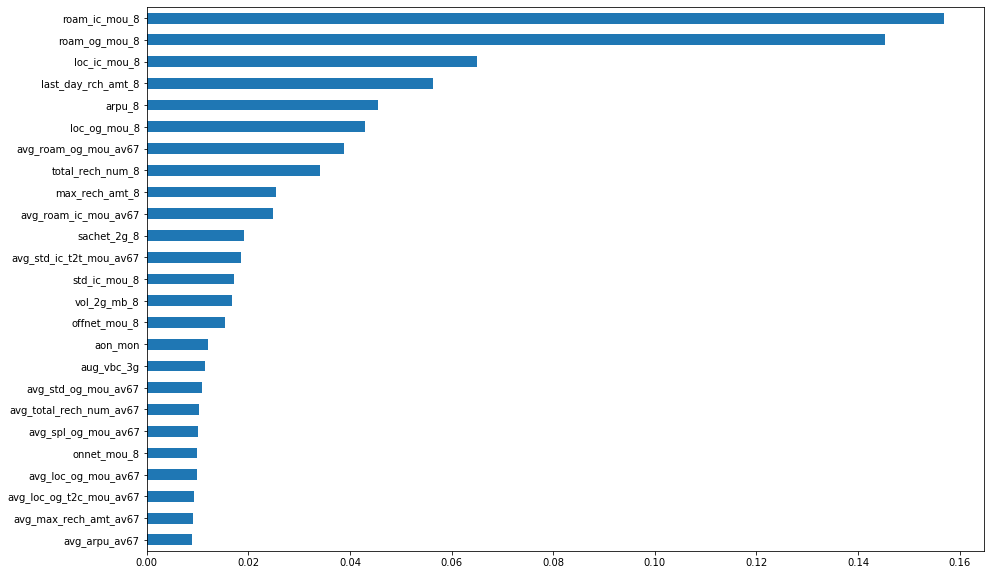

In [163]:
plt.figure(figsize=(15,10))
impo_features = pd.Series(balance_rf.feature_importances_, index=X.columns)
impo_features.nlargest((25)).sort_values().plot(kind='barh', align='center')
plt.show()

# Conclusion:

We can see from the above graph that most of the importance features are from the action phase that is Month of August. Hense we need to focus on this month very closely so as to prevent the customers who may possibly Churn in future. So action should be taken accordingly.

- roam_ic_mou_8 : voice calls in 8th Month
- roam_og_mou_8 : Roaming outgoing calls Minutes of usage - voice calls in 8th Month
- loc_ic_mou_8 : Local Incoming calls Minutes of usage, 8th Month
- last_day_rch_amt_8 : Last recharge amount in 8th month.
- arpu_8 : Average Revenue per Users, 8th Month
- loc_og_mou_8 : Local Outgoing calls mobile Minutes of usage, 8th Month
- avg_roam_og_mou_av67 : Average roaming outgoing minutes of usage, in 6 & 7 Month
- total_rech_num_8 : Total recharge number of data in 8th Month
- max_rech_amt_8 : Maximum Recharge amount in 8th Month
- avg_roam_ic_mou_av67 : verage roaming incoming minutes of usage, in 6 & 7 Month


# Recommendation:

- Important factors that Telecom compnay should monitor is already mentioned above.

- If number of calls starts reducing then it may be sign of customer trying to switch from one netwrok to another network or he is has already switched and using current netwrok for few days.

- Recharge amount is very important factor to notice if it starts reducing month by month then it need to be looked as cutomer may not be happy with the services he is getting that is why he started recharging with less amount.


- If internet speed that customer is getting is good, customer will finsh data soon and recharge it again but if network is poor and speed is not good then customer will not be able to finish it and will not recharge it multiple times. so need to look into areas where mnetwork is poor and customer care is receiving complaints multiple times.

- if all kinds of call and data usage reduces then it is serious concern as customer may be planning to churn and just timepassing for few more days. so company need to look into these ares.

- if customer is using the services for incoming calls only and has stopped using outgoing calls then he is finding the services very costly and may switch to network where incoming and outgoing services are in reasonable rate.


# Strategies:

Telecom company needs to pay attention to the roaming rate.They need to provide good offers to the customers who are usages services from the roaming zone.

The company need to focus on the call rates also. Provide them with some kind of STD and ISD packages.